In [1]:
import gym
import matplotlib.pyplot as plt
import collections
import numpy as np

In [2]:
def play_episodes(environ,epsilon,n_episode, reward_table, transit_table,value_table):   ## epsilon파트
    s = environ.reset()
    a = select_action(environ, epsilon,value_table, s)
    total_r = 0
    for _ in range(n_episode):
        while True:
            ns, r, done, info = environ.step(a)
            na = select_action(environ, epsilon,value_table, ns)

            reward_table[(s,a,ns)] = r
            transit_table[(s,a)][ns] += 1

            value_table[(s, a)] = value_table[(s, a)] + alpha*(r + gamma*value_table[(ns,na)]-value_table[(s,a)])

            total_r += r
            if done:
                s = environ.reset()
                a = select_action(environ, epsilon,value_table, s)
                break
            else:
                s = ns
                a = na
    mean_reward = total_r/n_episode

    return mean_reward



def select_action(environ, epsilon,value_table, state):   # sarsa -> e-greedy policy
    best_action, best_value = None, None
    
    if np.random.choice([True, False],p = [epsilon,1-epsilon]):
        action = environ.action_space.sample()
        return action
    else:
        for action in range(environ.action_space.n):
            # q value를 그때그때 계산해서 최댓값인 a를 액션으로 선택함 --> q learing과 차이/ qlenaring은 qvalue자체를 학습함
            action_value = value_table[(state, action)]
            if best_value is None or best_value < action_value:
                best_value = action_value
                best_action = action
    
    return best_action        

In [3]:
def play_episodes_qlearning(environ,epsilon,n_episode, reward_table, transit_table,value_table):   ## epsilon파트
    s = environ.reset()
    a = select_action_qlearning(environ, epsilon,value_table, s, ismu = False)
    total_r = 0
    for _ in range(n_episode):
        while True:
            ns, r, done, info = environ.step(a)

            reward_table[(s,a,ns)] = r
            transit_table[(s,a)][ns] += 1

            maxq_a = select_action_qlearning(environ, epsilon,value_table, ns, ismu = True)
            value_table[(s, a)] = value_table[(s, a)] + alpha*(r + gamma*value_table[(ns,maxq_a)]-value_table[(s,a)])

            total_r += r
            if done:
                s = environ.reset()
                a = select_action_qlearning(environ, epsilon,value_table, s, ismu = False)
                break
            else:
                s = ns
                a = select_action_qlearning(environ, epsilon,value_table, s, ismu = False)
    mean_reward = total_r/n_episode

    return mean_reward



def select_action_qlearning(environ, epsilon,value_table, state, ismu):   
    best_action, best_value = None, None
    
    if ismu:
        for action in range(environ.action_space.n):
            action_value = value_table[(state, action)]
            if best_value is None or best_value < action_value:
                best_value = action_value
                best_action = action
        return best_action 


    else:
        if np.random.choice([True, False],p = [epsilon,1-epsilon]):
            action = environ.action_space.sample()
            return action
        else:
            for action in range(environ.action_space.n):
                # q value를 그때그때 계산해서 최댓값인 a를 액션으로 선택함 --> q learing과 차이/ qlenaring은 qvalue자체를 학습함
                action_value = value_table[(state, action)]
                if best_value is None or best_value < action_value:
                    best_value = action_value
                    best_action = action
            return best_action 
    
           

In [4]:
# action = 0 or 1 or 2 or 3
# reward는 도착을해야만 1을 받음 나머지는 0
# state는 0~16까지
env = gym.make("FrozenLake-v1", is_slippery = True)
# env.render()
gamma = 0.9
alpha = 0.5
init_e = 1
n_epi = 50
batch_total_iter = 200

### sarsa method

In [91]:
%%time
e = init_e
reward_table = collections.defaultdict(float)
transit_table = collections.defaultdict(collections.Counter)
value_table = collections.defaultdict(float)
r_cum = []
iter_no = 0
best_reward = 0.

for _ in range(batch_total_iter):
    iter_no += 1
    reward = play_episodes(env,e,n_epi, reward_table, transit_table,value_table)
    r_cum.append(reward)
    e = e - e*(best_reward/1)
    if reward > best_reward:
        print(f"best reward updated {best_reward} --> {reward}")
        best_reward = reward
    # if reward > 0.8:
    #     print(f"solved in {iter_no} iterations! _ total episode trial n is {iter_no*n_epi}")
    #     break

best reward updated 0.0 --> 0.04
best reward updated 0.04 --> 0.06
best reward updated 0.06 --> 0.08
best reward updated 0.08 --> 0.12
best reward updated 0.12 --> 0.14
best reward updated 0.14 --> 0.2
best reward updated 0.2 --> 0.38
best reward updated 0.38 --> 0.44
best reward updated 0.44 --> 0.7
best reward updated 0.7 --> 0.8
best reward updated 0.8 --> 0.88
CPU times: total: 8.45 s
Wall time: 8.46 s


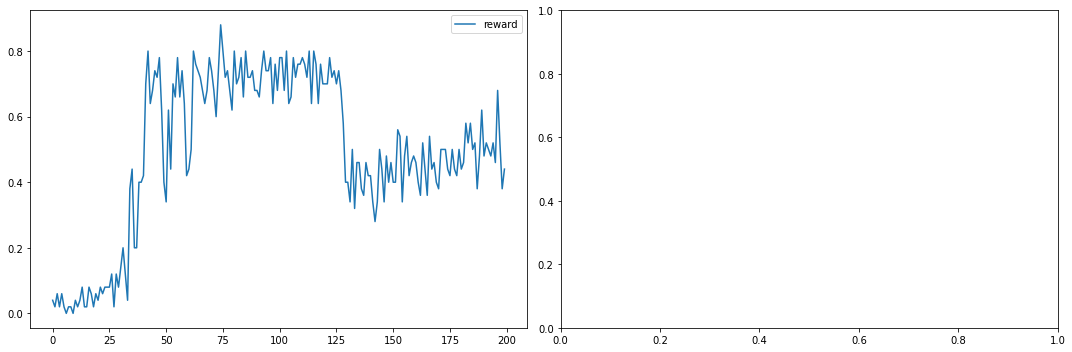

In [92]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(r_cum, label='reward')
axes[0].legend()
fig.tight_layout()

In [ ]:
reward_table

In [ ]:
value_table

In [ ]:
transit_table

### qlearning method

In [5]:
%%time
e = init_e
reward_table = collections.defaultdict(float)
transit_table = collections.defaultdict(collections.Counter)
value_table = collections.defaultdict(float)

r_cum = []
iter_no = 0
best_reward = 0.

for _ in range(batch_total_iter):
    iter_no += 1
    reward = play_episodes_qlearning(env,e,n_epi, reward_table, transit_table,value_table)
    r_cum.append(reward)
    e = e - e*(best_reward/1)
    if reward > best_reward:
        print(f"best reward updated {best_reward} --> {reward}")
        best_reward = reward
    # if reward > 0.8:
    #     print(f"solved in {iter_no} iterations! _ total episode trial n is {iter_no*n_epi}")
    #     break

best reward updated 0.0 --> 0.02
best reward updated 0.02 --> 0.04
best reward updated 0.04 --> 0.06
best reward updated 0.06 --> 0.08
best reward updated 0.08 --> 0.1
best reward updated 0.1 --> 0.14
best reward updated 0.14 --> 0.22
best reward updated 0.22 --> 0.24
best reward updated 0.24 --> 0.34
best reward updated 0.34 --> 0.5
best reward updated 0.5 --> 0.6
best reward updated 0.6 --> 0.62
best reward updated 0.62 --> 0.66
best reward updated 0.66 --> 0.68
best reward updated 0.68 --> 0.72
best reward updated 0.72 --> 0.74
best reward updated 0.74 --> 0.76
best reward updated 0.76 --> 0.78
best reward updated 0.78 --> 0.8
best reward updated 0.8 --> 0.82
best reward updated 0.82 --> 0.86
best reward updated 0.86 --> 0.92
CPU times: total: 9.27 s
Wall time: 9.24 s


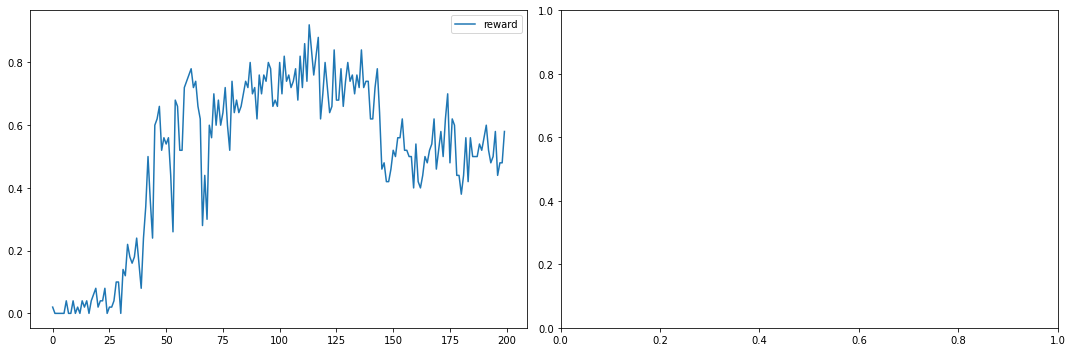

In [6]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(r_cum, label='reward')
axes[0].legend()
fig.tight_layout()

In [ ]:
reward_table

In [7]:
value_table

defaultdict(float,
            {(0, 0): 0.005394494138847116,
             (0, 1): 0.07693201529308057,
             (0, 2): 0.005287044606041047,
             (0, 3): 0.005543013311051279,
             (4, 0): 0.09725080121476279,
             (4, 1): 0.006629057067241125,
             (4, 2): 0.004391731746559448,
             (4, 3): 0.003512176443000843,
             (8, 0): 0.013233401591545606,
             (8, 1): 0.009503719710429221,
             (8, 2): 0.008901612730709125,
             (8, 3): 0.15263027305450666,
             (12, 0): 0.0,
             (12, 1): 0.0,
             (12, 2): 0.0,
             (12, 3): 0.0,
             (1, 0): 0.002750737178443701,
             (1, 1): 0.0027089551164731314,
             (1, 2): 0.0028165857861272765,
             (1, 3): 0.03205763242572876,
             (2, 0): 0.03740636512832779,
             (2, 1): 0.001554326282573855,
             (2, 2): 0.0016299944972514306,
             (2, 3): 0.0017572737166028825,
             (

In [ ]:
transit_table

In [51]:
s = env.reset()
env.render()
maxq_a = select_action_qlearning(env, 0,value_table, s, ismu = True)

In [122]:
ns, r, done, info = env.step(maxq_a)
env.render()

s = ns
maxq_a = select_action_qlearning(env, 0,value_table, s, ismu = True)
print(maxq_a)

0


: 

In [8]:
maxq_a

0